In [101]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import pandas_profiling
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import collections
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support,accuracy_score)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras.objectives import binary_crossentropy
from keras.callbacks import LearningRateScheduler
from keras.utils.vis_utils import model_to_dot
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras.backend as K
from keras.callbacks import Callback
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)


## Load the data

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [77]:
pandas_profiling.ProfileReport(df)

Number of variables,21
Number of observations,7043
Total Missing (%),0.0%
Total size in memory,1.1 MiB
Average record size in memory,168.0 B
Numeric,2
Categorical,17
Boolean,1
Date,0
Text (Unique),1
Rejected,0


In [78]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


## Categorical Features Analysis

### Gender

Gender Counter({'Male': 3555, 'Female': 3488})


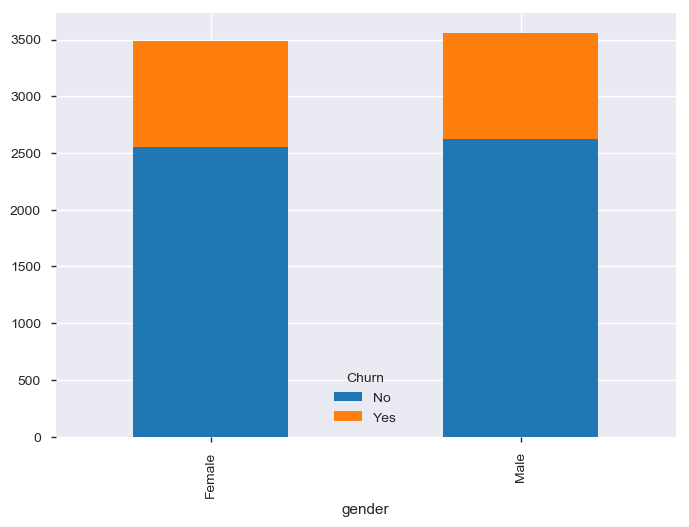

In [16]:
gender_plot = df.groupby(['gender', 'Churn']).size().reset_index().pivot(columns='Churn', index='gender', values=0)
gender_plot.index

gender_plot.plot( kind='bar', stacked=True);
print('Gender', collections.Counter(df['gender']))

__It seems gender does not have effect on the churn__ 

### Partner

Partner Counter({'No': 3641, 'Yes': 3402})


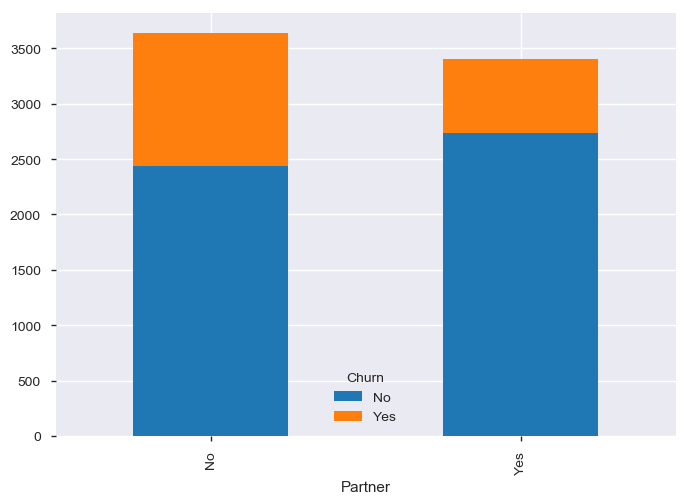

In [18]:
gender_plot = df.groupby(['Partner', 'Churn']).size().reset_index().pivot(columns='Churn', index='Partner', values=0)
gender_plot.index

gender_plot.plot( kind='bar', stacked=True);
print('Partner', collections.Counter(df['Partner']))

__Partner probably has effect on the churn__

### Dependents

Dependents Counter({'No': 4933, 'Yes': 2110})


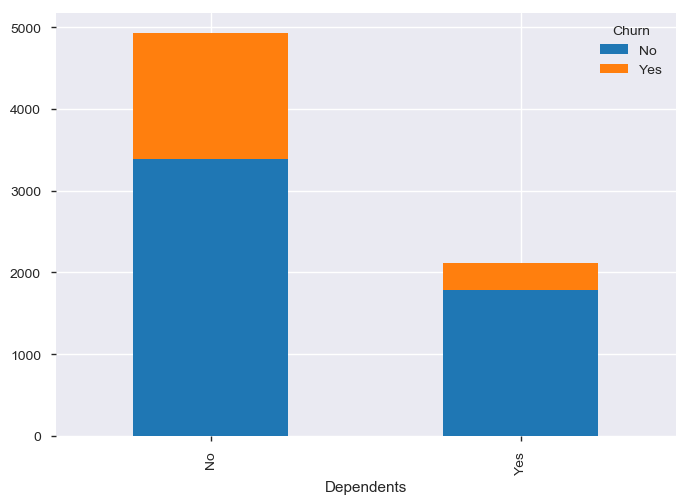

In [20]:
dependents_plot = df.groupby(['Dependents', 'Churn']).size().reset_index().pivot(columns='Churn', index='Dependents', values=0)
dependents_plot.plot(kind='bar', stacked=True);
print('Dependents', collections.Counter(df['Dependents']))

__Customers without dependents are more likely to churn.__

### PhoneService


PhoneService Counter({'Yes': 6361, 'No': 682})


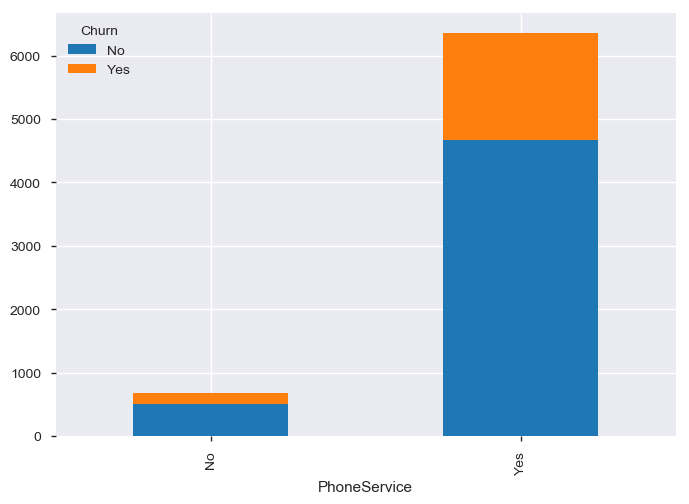

In [25]:
phoneservice_plot = df.groupby(['PhoneService', 'Churn']).size().reset_index().pivot(columns='Churn', index='PhoneService', values=0)
print('PhoneService', collections.Counter(df['PhoneService']))
phoneservice_plot.plot( kind='bar', stacked=True);

__About 90% of customers signed up for phone service. Currently it is hard to see if it affects the churn.__

### MultipleLines

MultipleLines Counter({'No': 3390, 'Yes': 2971, 'No phone service': 682})


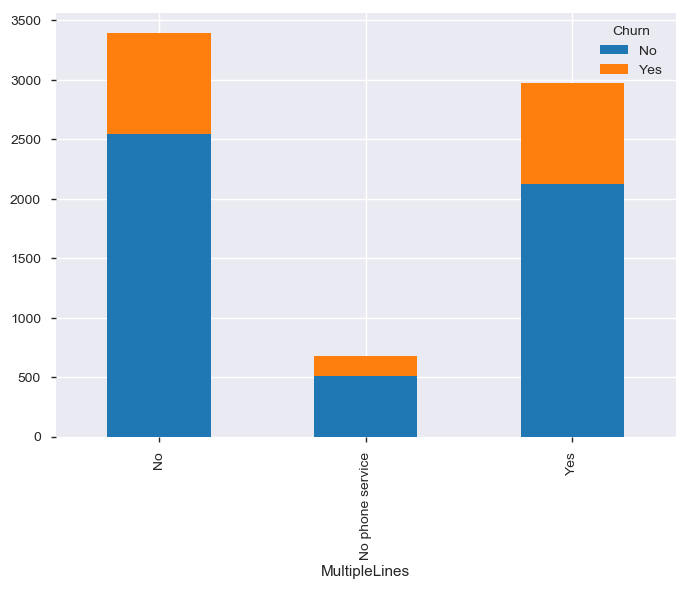

In [26]:
multiplelines_plot = df.groupby(['MultipleLines', 'Churn']).size().reset_index().pivot(columns='Churn', index='MultipleLines', values=0)
multiplelines_plot.plot(kind='bar', stacked=True);
print('MultipleLines', collections.Counter(df['MultipleLines']))

__Whether customers have multiple lines or not does not seem to have an effect on the churn.__

### InternetService

InternetService Counter({'Fiber optic': 3096, 'DSL': 2421, 'No': 1526})


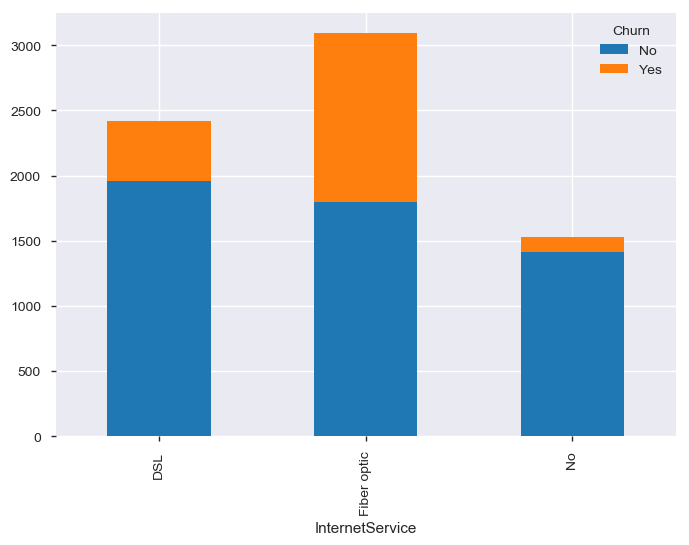

In [36]:
internetservice_plot = df.groupby(['InternetService', 'Churn']).size().reset_index().pivot(columns='Churn', index='InternetService', values=0)
internetservice_plot.plot(kind='bar', stacked=True);
print('InternetService', collections.Counter(df['InternetService']))

__Customers of Fiber Optic were much more likely to churn. And customers without internet service have very low churn rate.__

### OnlineSecurity


OnlineSecurity Counter({'No': 3498, 'Yes': 2019, 'No internet service': 1526})


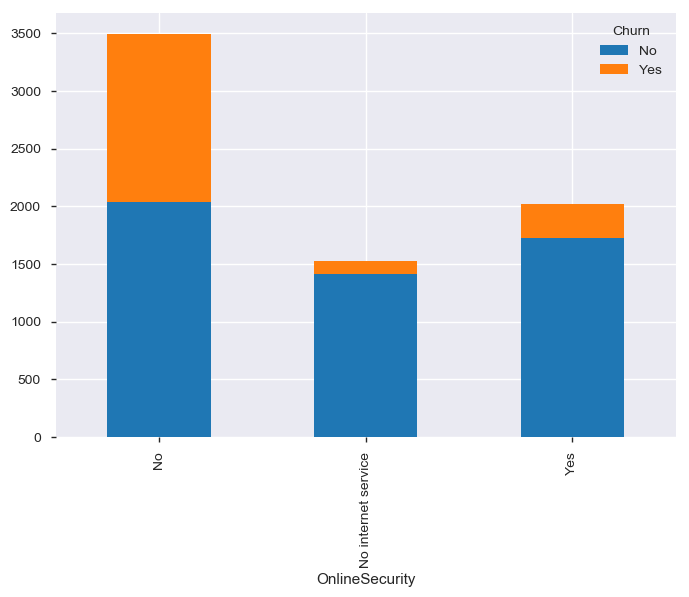

In [37]:
onlinesecurity_plot = df.groupby(['OnlineSecurity', 'Churn']).size().reset_index().pivot(columns='Churn', index='OnlineSecurity', values=0)
onlinesecurity_plot.plot(kind='bar', stacked=True);
print('OnlineSecurity', collections.Counter(df['OnlineSecurity']))

__Customers who did not have online security are much more likely to churn.__

### OnlineBackup

OnlineBackup Counter({'No': 3088, 'Yes': 2429, 'No internet service': 1526})


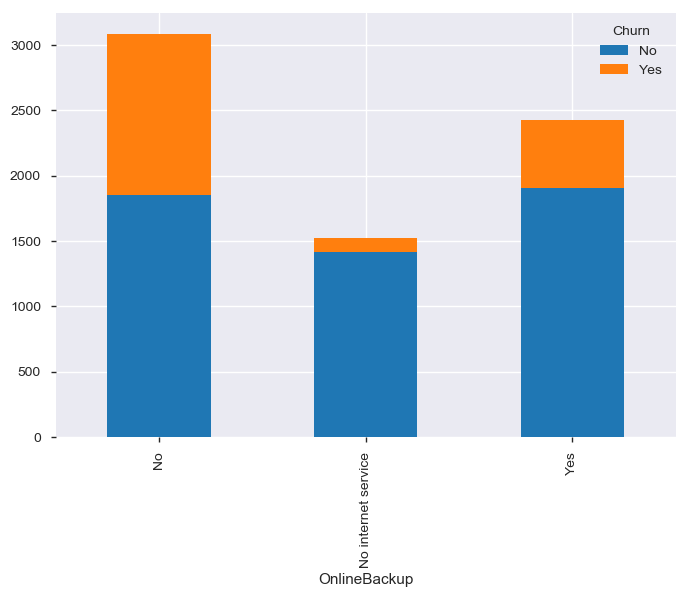

In [38]:
onlinebackup_plot = df.groupby(['OnlineBackup', 'Churn']).size().reset_index().pivot(columns='Churn', index='OnlineBackup', values=0)
onlinebackup_plot.plot(kind='bar', stacked=True);
print('OnlineBackup', collections.Counter(df['OnlineBackup']))

__Agian, customers who did not have onlineback are more likely to churn__


### DeviceProtection

DeviceProtection Counter({'No': 3095, 'Yes': 2422, 'No internet service': 1526})


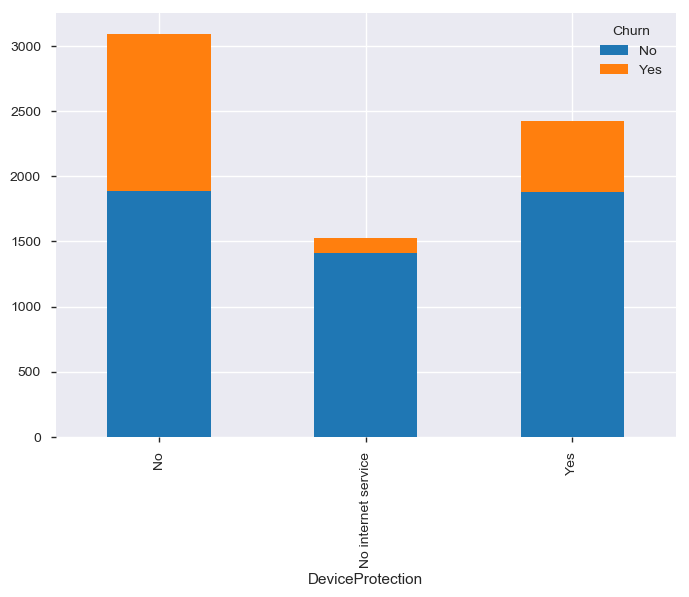

In [39]:
deviceprotection_plot = df.groupby(['DeviceProtection', 'Churn']).size().reset_index().pivot(columns='Churn', index='DeviceProtection', values=0)
deviceprotection_plot.plot( kind='bar', stacked=True);
print('DeviceProtection', collections.Counter(df['DeviceProtection']))

__Customers who did not have deviceprotection are more likely to churn__

### TechSupport

TechSupport Counter({'No': 3473, 'Yes': 2044, 'No internet service': 1526})


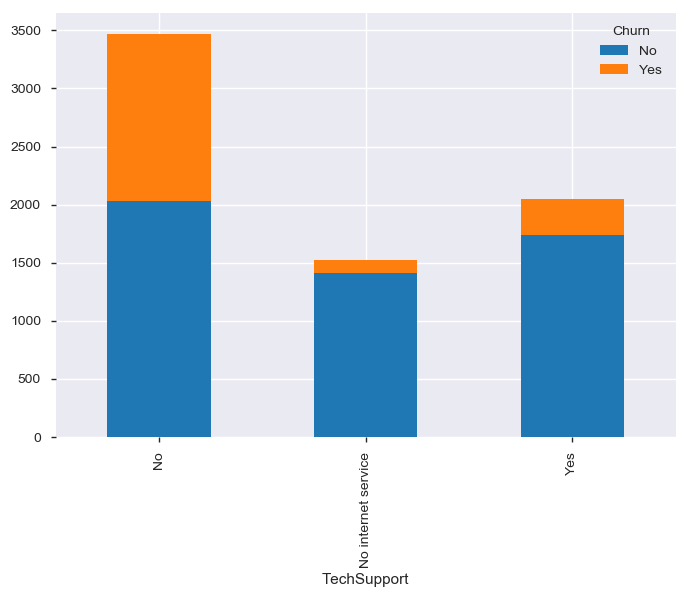

In [42]:
techsupport_plot = df.groupby(['TechSupport', 'Churn']).size().reset_index().pivot(columns='Churn', index='TechSupport', values=0)
techsupport_plot.plot(kind='bar', stacked=True);
print('TechSupport', collections.Counter(df['TechSupport']))

__More than 40% of customers who did not sign up TechSupport are more likely to churn.__


### StreamingTV

StreamingTV Counter({'No': 2810, 'Yes': 2707, 'No internet service': 1526})


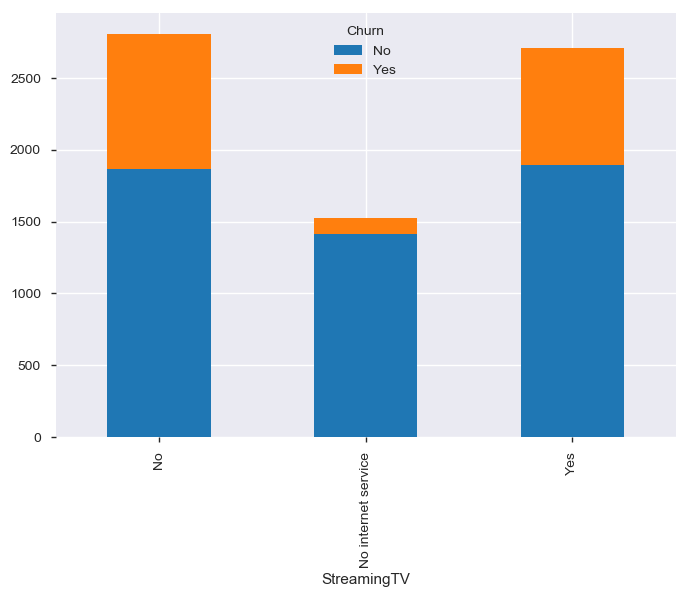

In [44]:
streamingtv_plot = df.groupby(['StreamingTV', 'Churn']).size().reset_index().pivot(columns='Churn', index='StreamingTV', values=0)
streamingtv_plot.plot(kind='bar', stacked=True);
print('StreamingTV', collections.Counter(df['StreamingTV']))

__StreamingTV did barely affect the churn__

### StreamingMovies

StreamingMovies Counter({'No': 2785, 'Yes': 2732, 'No internet service': 1526})


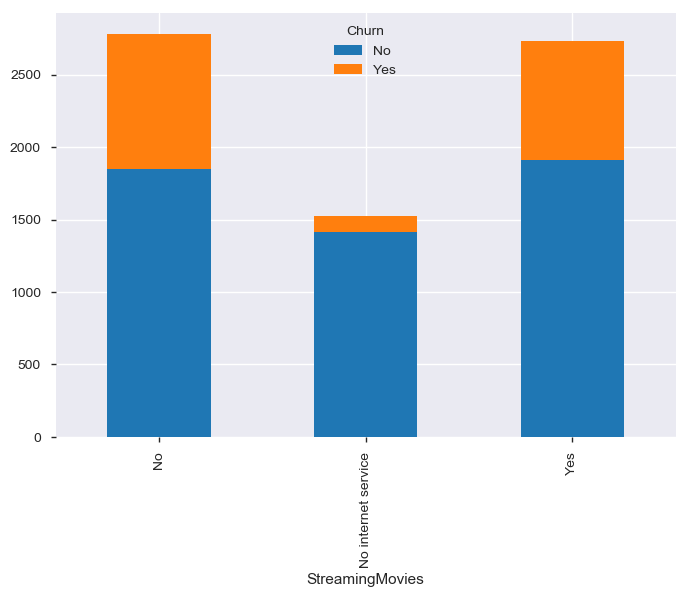

In [46]:
streamingmovies_plot = df.groupby(['StreamingMovies', 'Churn']).size().reset_index().pivot(columns='Churn', index='StreamingMovies', values=0)
streamingmovies_plot.plot( kind='bar', stacked=True);
print('StreamingMovies', collections.Counter(df['StreamingMovies']))

__Like SreamingTv, StreamingMovies did not have effect on the churn__

### PaperlessBilling

PaperlessBilling Counter({'Yes': 4171, 'No': 2872})


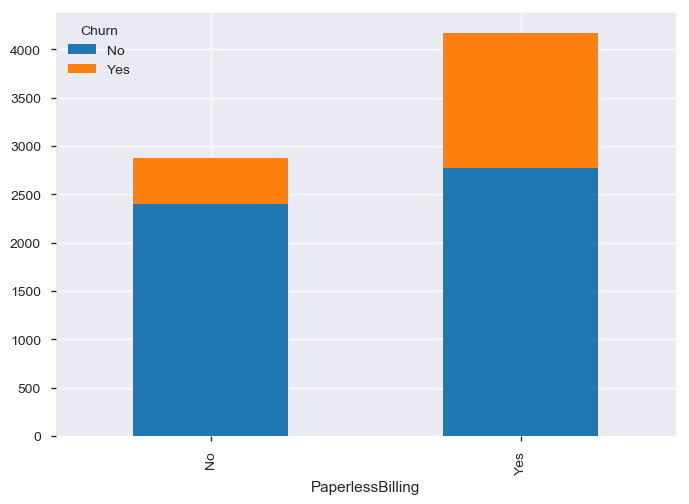

In [48]:
paperlessbilling_plot = df.groupby(['PaperlessBilling', 'Churn']).size().reset_index().pivot(columns='Churn', index='PaperlessBilling', values=0)
paperlessbilling_plot.plot(kind='bar', stacked=True);
print('PaperlessBilling', collections.Counter(df['PaperlessBilling']))

### PaymentMethod

PaymentMethod Counter({'Electronic check': 2365, 'Mailed check': 1612, 'Bank transfer (automatic)': 1544, 'Credit card (automatic)': 1522})


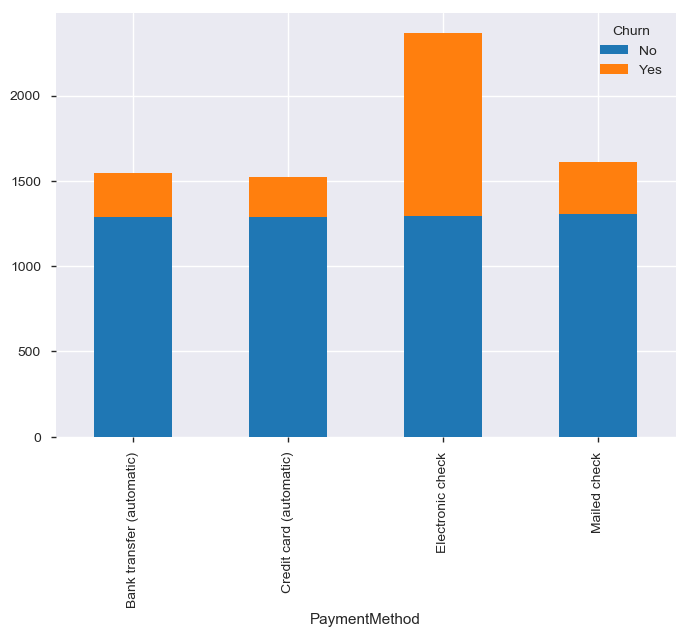

In [49]:
paymentmethod_plot = df.groupby(['PaymentMethod', 'Churn']).size().reset_index().pivot(columns='Churn', index='PaymentMethod', values=0)
paymentmethod_plot.plot(kind='bar', stacked=True);
print('PaymentMethod', collections.Counter(df['PaymentMethod']))


__PaymentMethod is very likely to have effect on the churn, especially the eletronic check has very high churn rate.__

### SeniorCitizen

SeniorCitizen Counter({0: 5901, 1: 1142})


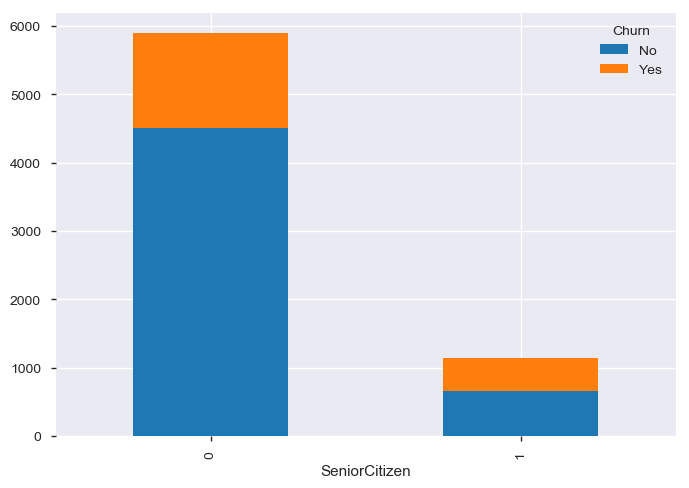

In [50]:
seniorcitizen_plot = df.groupby(['SeniorCitizen', 'Churn']).size().reset_index().pivot(columns='Churn', index='SeniorCitizen', values=0)
seniorcitizen_plot.plot(kind='bar', stacked=True);
print('SeniorCitizen', collections.Counter(df['SeniorCitizen']))

__Hard to determien if the SeniorCitizen has effect on the churn.__

## Numerical Features Analysis

### Tenure

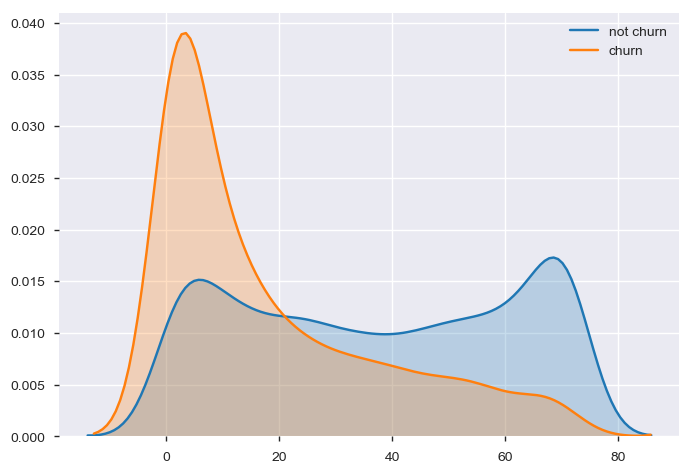

In [53]:
sns.kdeplot(df['tenure'].loc[df['Churn'] == 'No'], label='not churn', shade=True);
sns.kdeplot(df['tenure'].loc[df['Churn'] == 'Yes'], label='churn', shade=True);

In [57]:
diff = round(df['tenure'].loc[df['Churn'] == 'No'].mean() - df['tenure'].loc[df['Churn'] == 'Yes'].mean())
print(f"Not churned customers have a much longer average tenure ({diff} months) than the churned customers.")

Not churned customers have a much longer average tenure (20 months) than the churned customers.


### Monthly Charges

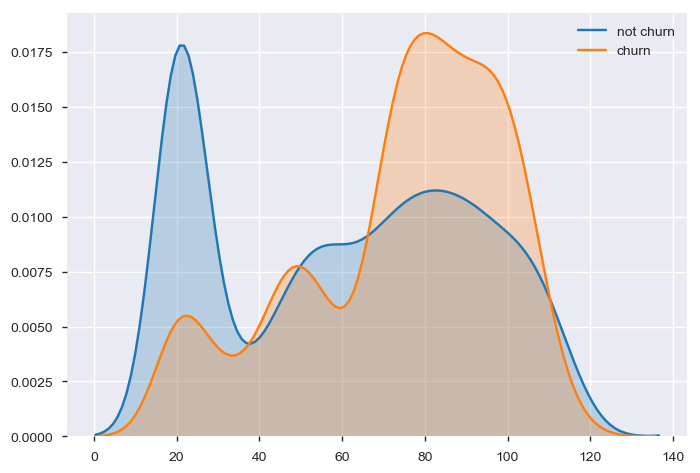

In [58]:
sns.kdeplot(df['MonthlyCharges'].loc[df['Churn'] == 'No'], label='not churn', shade=True);
sns.kdeplot(df['MonthlyCharges'].loc[df['Churn'] == 'Yes'], label='churn', shade=True);

In [69]:
diff = (df['MonthlyCharges'].loc[df['Churn'] == 'Yes'].mean() - df['MonthlyCharges'].loc[df['Churn'] == 'No'].mean())/df['MonthlyCharges'].loc[df['Churn'] == 'No'].mean()
print(f"Churned customers paid over {round(diff*100)}% higher on average monthly fee than not-churned customers.")




Churned customers paid over 22% higher on average monthly fee than not-churned customers.


### TotalCharges

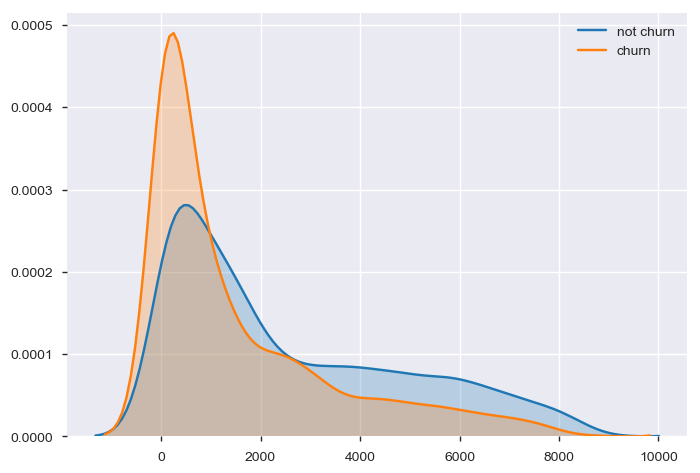

In [79]:
sns.kdeplot(df['TotalCharges'].loc[df['Churn'] == 'No'], label='not churn', shade=True);
sns.kdeplot(df['TotalCharges'].loc[df['Churn'] == 'Yes'], label='churn', shade=True);

## Data Pre-precossing

### Filling Missing Value

In [81]:
df = df.fillna(df.mean())

### Encoding

In [82]:
le = preprocessing.LabelEncoder()
df['Churn'] = le.fit_transform(df.Churn.values)

In [83]:
categorical =  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
for f in categorical:
    dummies = pd.get_dummies(df[f], prefix = f, prefix_sep = '_')
    df = pd.concat([df, dummies], axis = 1)
# drop original categorical features
df.drop(categorical, axis = 1, inplace = True)

### Train_Test Split 

In [85]:
X_train, X_val = train_test_split(df, test_size=2958)

cols = [c for c in df.columns if c not in ['customerID','Churn']]
y_train = X_train['Churn'].as_matrix()
X_train = MinMaxScaler().fit_transform(X_train[cols])
y_val= X_val['Churn'].as_matrix()
X_val = MinMaxScaler().fit_transform(X_val[cols])

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=1479, random_state=0)

# Create batch to send through our network
def fit_batchsize(X,y,batch_size):
    n_size = (len(X)//batch_size)*batch_size
    X = X[0:n_size]
    y = y[0:n_size]
    return X, y

batch_size = 100

X_train, y_train = fit_batchsize(X_train,y_train, batch_size)
X_val, y_val = fit_batchsize(X_val, y_val, batch_size)

X_test,y_test = fit_batchsize(X_test,y_test, batch_size)

## Modeling

- Define input layer.
- Define encoder layer.
- Encoder model, to encode input into latent variable.
- We use the mean as the output as it is the center point, the representative of the Gaussian.
- We sample from the output of the 2 dense layers.
- Define decoder layer in VAE model.
- Define overall VAE model, for reconstruction and training.
- Define generator model, generate new data given latent variable z.
- Translate our loss into Keras code.
- Start training.

In [87]:
# Define input layer
input_dim = X_train.shape[1]
inputs = Input(shape=(input_dim,))
# Define Encoder layers
n_z = 2
n_epoch = 200

h_q = Dense(512, activation='relu')(inputs)
mu = Dense(n_z, activation='linear')(h_q)
log_sigma = Dense(n_z, activation='linear')(h_q)

# Encoder model, to encode input into latent variable
# We use the mean as the output as it is the center point, the representative of the gaussian
encoder = Model(inputs, mu)

def sample_z(args):
    mu, log_sigma = args
    eps = K.random_normal(shape=(batch_size, n_z), mean=0., stddev=1.)
    return mu + K.exp(log_sigma / 2) * eps


# Sample z ~ Q(z|X)
z = Lambda(sample_z, name='sampleZ', output_shape=(n_z,))([mu, log_sigma])

# Define decoder layers in VAE model
decoder_hidden = Dense(512, activation='relu')
decoder_out = Dense(input_dim, activation='sigmoid')

h_p = decoder_hidden(z)
outputs = decoder_out(h_p)

# Overall VAE model, for reconstruction and training
vae = Model(inputs, outputs)

# Generator model, generate new data given latent variable z
d_in = Input(shape=(n_z,))
d_h = decoder_hidden(d_in)
d_out = decoder_out(d_h)
decoder = Model(d_in, d_out)

# translate our loss into Keras code
def vae_loss(y_true, y_pred):
    """ Calculate loss = reconstruction loss + KL loss for each data in minibatch """
    recon = K.sum(K.binary_crossentropy(y_pred, y_true), axis=1)
    kl = 0.5 * K.sum(K.exp(log_sigma) + K.square(mu) - 1. - log_sigma, axis=1)

    return recon + kl
   
vae.compile(optimizer='adam', loss=vae_loss)
vae_history = vae.fit(X_train, X_train, batch_size=batch_size, shuffle=True, 
                      validation_data = (X_val, X_val),
                    epochs=n_epoch, callbacks = [EarlyStopping(monitor='loss',patience = 3)])

Train on 4000 samples, validate on 1400 samples
Epoch 1/200
4000/4000 [==============================] - 2s 597us/step - loss: 282.9873 - val_loss: 235.4443
Epoch 2/200
4000/4000 [==============================] - 2s 376us/step - loss: 223.4703 - val_loss: 210.0325
Epoch 3/200
4000/4000 [==============================] - 1s 339us/step - loss: 203.3068 - val_loss: 197.9756
Epoch 4/200
4000/4000 [==============================] - 1s 375us/step - loss: 193.3731 - val_loss: 186.0647
Epoch 5/200
4000/4000 [==============================] - 1s 342us/step - loss: 174.3058 - val_loss: 166.5038
Epoch 6/200
4000/4000 [==============================] - 1s 339us/step - loss: 163.3471 - val_loss: 158.5790
Epoch 7/200
4000/4000 [==============================] - 1s 350us/step - loss: 156.1012 - val_loss: 152.8415
Epoch 8/200
4000/4000 [==============================] - 2s 381us/step - loss: 152.2859 - val_loss: 150.5538
Epoch 9/200
4000/4000 [==============================] - 1s 373us/step - loss: 1

## Evaluation

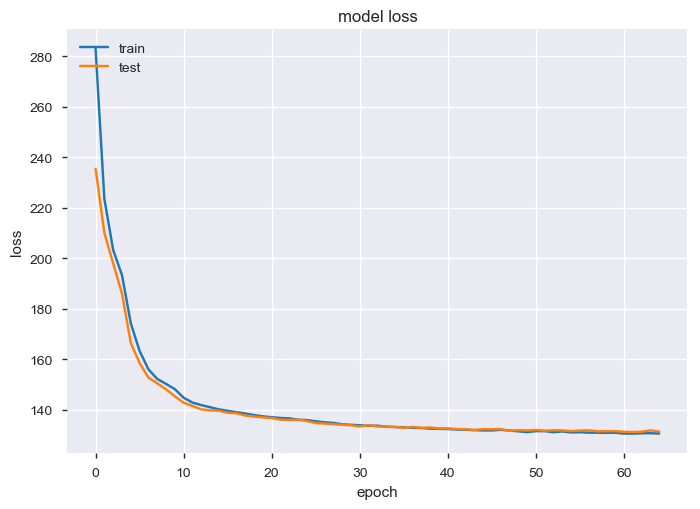

In [88]:
plt.plot(vae_history.history['loss'])
plt.plot(vae_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show();


__From the above loss plot, we can see that the model has comparable performance on both train and validation data sets, and it seems to converge nicely at the end.__

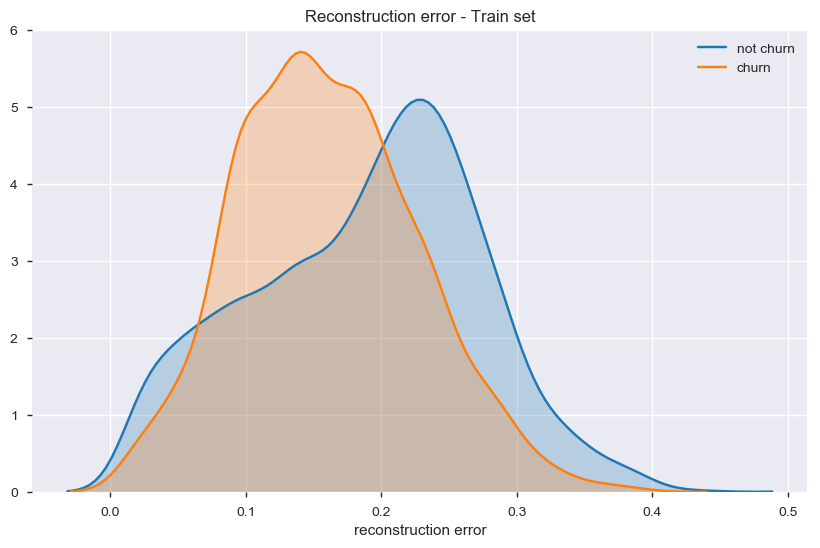

In [89]:
x_train_encoded = encoder.predict(X_train)
pred_train = decoder.predict(x_train_encoded)
mse = np.mean(np.power(X_train - pred_train, 2), axis=1)
error_df = pd.DataFrame({'recon_error': mse,
                        'churn': y_train})
plt.figure(figsize=(10,6))
sns.kdeplot(error_df.recon_error[error_df.churn==0], label='not churn', shade=True, clip=(0,10))
sns.kdeplot(error_df.recon_error[error_df.churn==1], label='churn', shade=True, clip=(0,10))
plt.xlabel('reconstruction error');
plt.title('Reconstruction error - Train set');

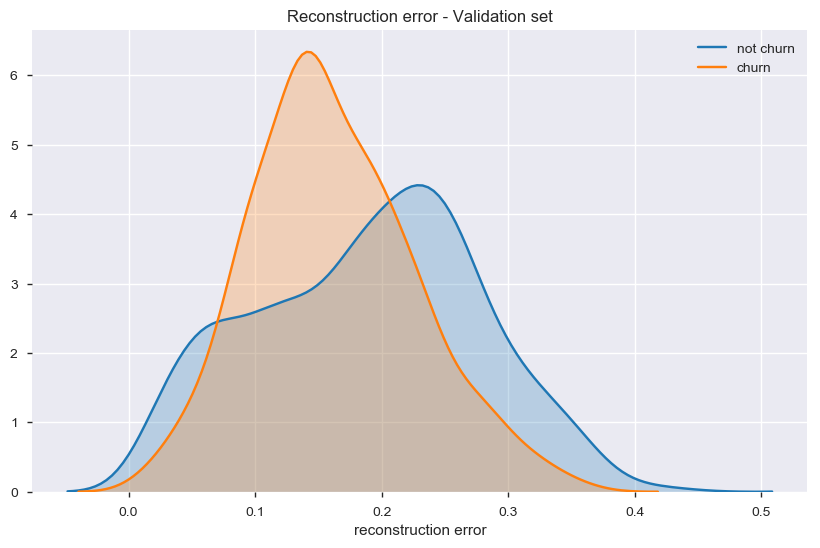

In [90]:
x_val_encoded = encoder.predict(X_val)
pred = decoder.predict(x_val_encoded)
mseV = np.mean(np.power(X_val - pred, 2), axis=1)
error_df = pd.DataFrame({'recon_error': mseV,
                        'churn': y_val})
plt.figure(figsize=(10,6))
sns.kdeplot(error_df.recon_error[error_df.churn==0], label='not churn', shade=True, clip=(0,10))
sns.kdeplot(error_df.recon_error[error_df.churn==1], label='churn', shade=True, clip=(0,10))
plt.xlabel('reconstruction error');
plt.title('Reconstruction error - Validation set');

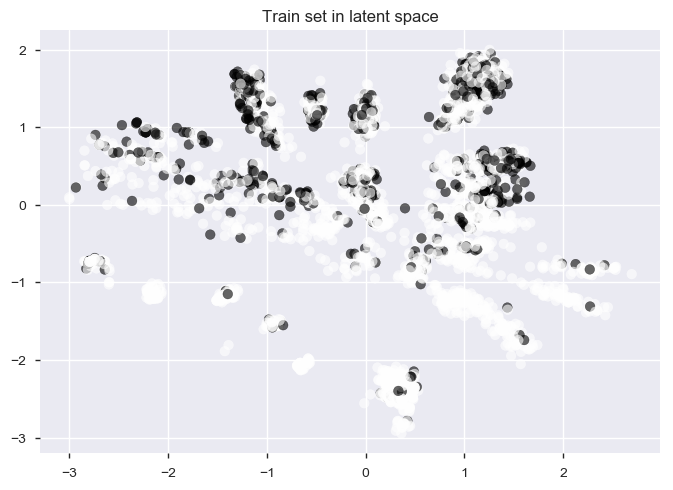

In [94]:
x_train_encoded = encoder.predict(X_train)
plt.scatter(x_train_encoded[:, 0], x_train_encoded[:, 1], 
            c=y_train, alpha=0.6)
plt.title('Train set in latent space')
plt.show();

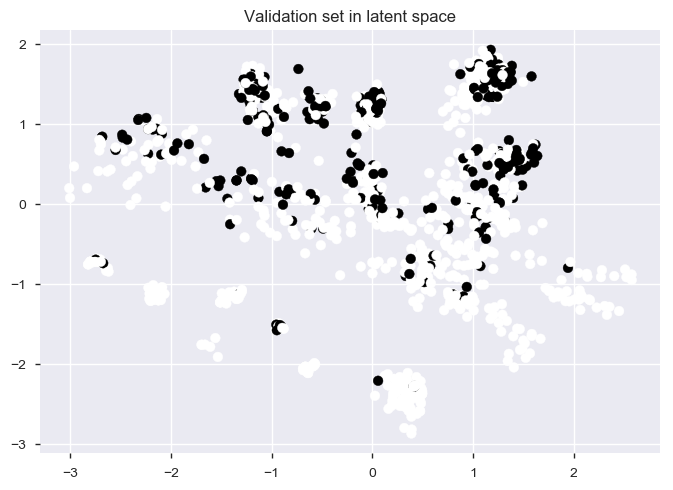

In [96]:
x_val_encoded = encoder.predict(X_val)
plt.scatter(x_val_encoded[:, 0], x_val_encoded[:, 1], 
            c=y_val, alpha=0.6)
plt.title('Validation set in latent space')
plt.show();

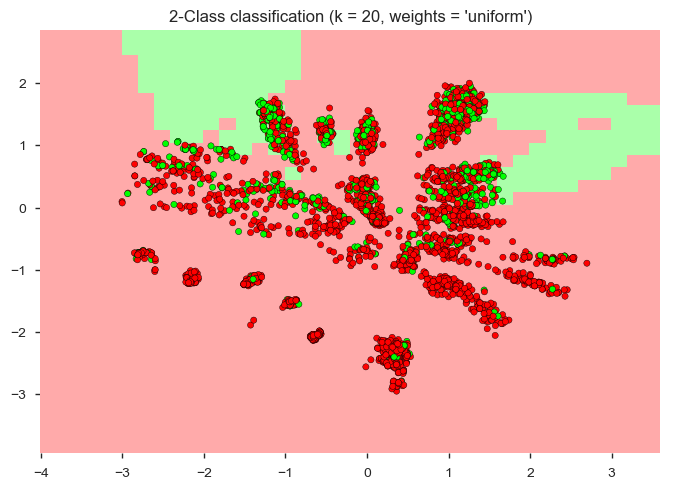

In [98]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
weights='uniform'
n_neighbors=20
clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
X=x_train_encoded
y=y_train
clf.fit(X, y)

h=0.2
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i, weights = '%s')"
            % (n_neighbors, weights));

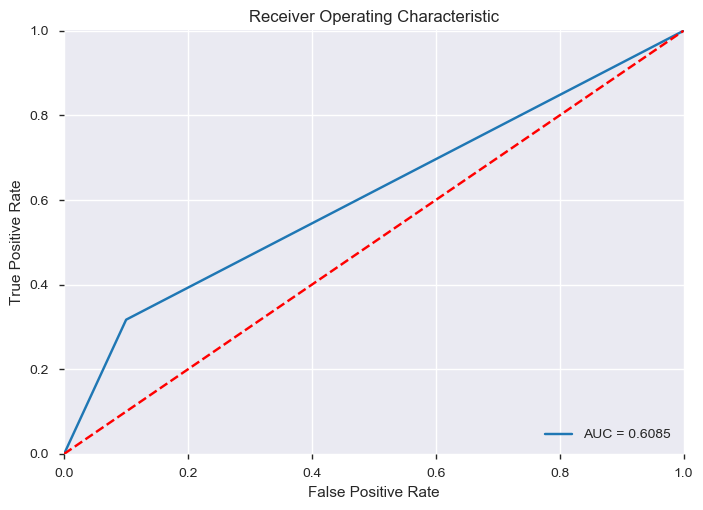

In [99]:
x_val_encoded = encoder.predict(X_val)
fpr, tpr, thresholds = roc_curve(y_val, clf.predict(x_val_encoded))
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

In [102]:
print('Accuracy:')
print(accuracy_score(y_val, clf.predict(x_val_encoded)))
print("Confusion Matrix:")
print(confusion_matrix(y_val,clf.predict(x_val_encoded)))
print("Classification Report:")
print(classification_report(y_val,clf.predict(x_val_encoded)))

Accuracy:
0.7371428571428571
Confusion Matrix:
[[908 101]
 [267 124]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83      1009
           1       0.55      0.32      0.40       391

   micro avg       0.74      0.74      0.74      1400
   macro avg       0.66      0.61      0.62      1400
weighted avg       0.71      0.74      0.71      1400



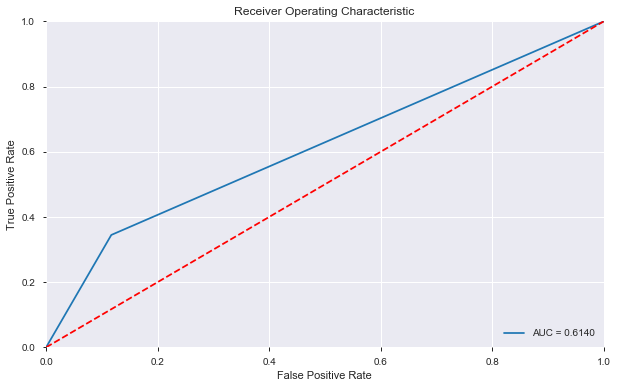

In [103]:
x_test_encoded = encoder.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, clf.predict(x_test_encoded))
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();


In [104]:
print('Accuracy:')
print(accuracy_score(y_test, clf.predict(x_test_encoded)))
print("Confusion Matrix:")
print(confusion_matrix(y_test,clf.predict(x_test_encoded)))
print("Classification Report:")
print(classification_report(y_test,clf.predict(x_test_encoded)))

Accuracy:
0.7492857142857143
Confusion Matrix:
[[929 123]
 [228 120]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1052
           1       0.49      0.34      0.41       348

   micro avg       0.75      0.75      0.75      1400
   macro avg       0.65      0.61      0.62      1400
weighted avg       0.73      0.75      0.73      1400

